In [ ]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

In [1]:
import pandas as pd

import sys
sys.path.append("..")

import multi_prophet

In [2]:
df = pd.read_csv("../data/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
    
df["nfl_sunday"] = df["ds"].apply(nfl_sunday)
df.head()

,ds,y,nfl_sunday
0,2007-12-10,9.590761,0
1,2007-12-11,8.519590,0
2,2007-12-12,8.183677,0
3,2007-12-13,8.072467,0
4,2007-12-14,7.893572,0


In [4]:
regressors = {
    "y": [{"name": "nfl_sunday"}]
}

m = multi_prophet.MultiProphet(columns=["y"], regressors=regressors)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


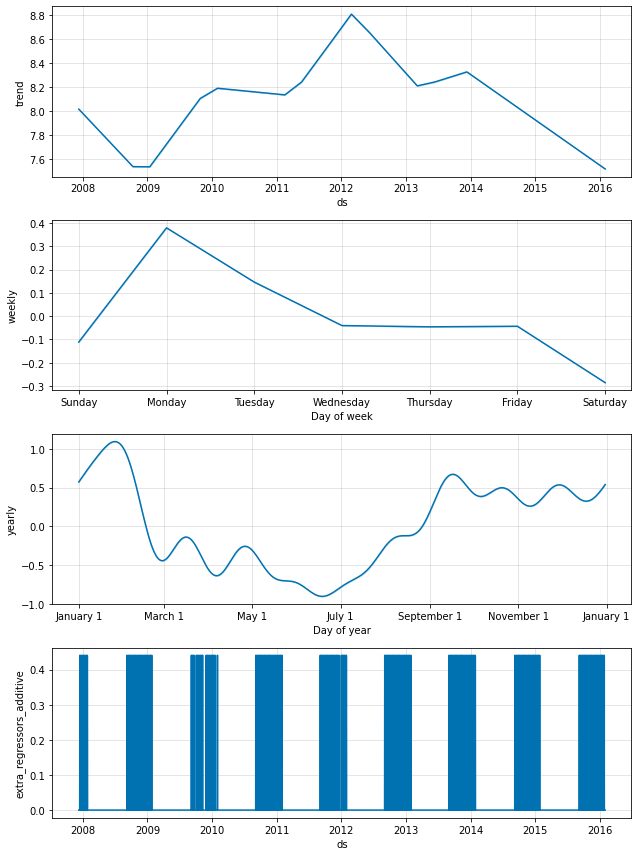

In [6]:
future_df = m.make_future_dataframe(periods=10)
future_df["nfl_sunday"] = future_df["ds"].apply(nfl_sunday)

forecast = m.predict(future_df)

{'y': <Figure size 720x432 with 1 Axes>}

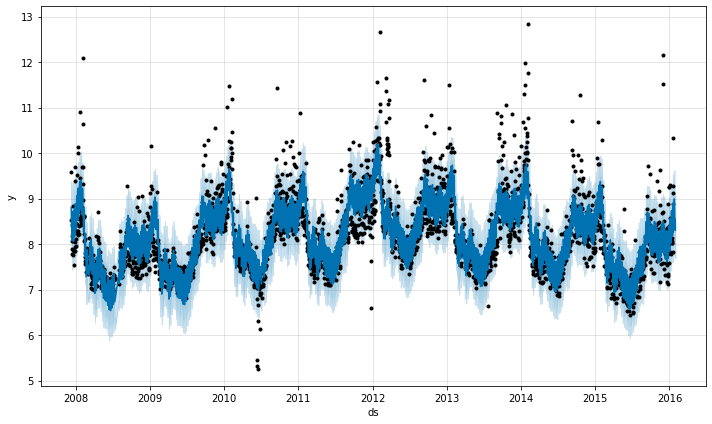

In [7]:
m.plot(forecast)